In [28]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [29]:
# График случайных блужданий
def plot_random_walk(matrix, upper_limit, lower_limit):
    
    num_walks = len(matrix) # Количество случайных блужданий
    x = np.arange(max([len(arr) for arr in matrix]) + 1) # Создаем массив значений оси x (временной шаг)

    for arr in matrix:
        sum_arr = np.cumsum(arr) # Вычисляем накопленную сумму элементов массива arr
        y = np.concatenate(([0], sum_arr)) # Создаем массив значений оси y (целевая переменная)

#         # Создаем массивы значений изменения по осям x и y для вертикальных линий

        # Рисуем случайное блуждание
        for i in range(len(arr)):
            if arr[i] > 0:
                # Рисуем вертикальную линию вверх
                plt.plot([i, i], [y[i], y[i] + arr[i]], 'b')
                if y[i] + arr[i] == upper_limit:
                    plt.scatter(i, y[i] + arr[i], color='green')
                    break
                plt.plot([i, i+1], [y[i] + arr[i], y[i] + arr[i]], 'b')
            elif arr[i] < 0:
                # Рисуем вертикальную линию вниз
                plt.plot([i, i], [y[i], y[i] + arr[i]], 'orange')
                if y[i] + arr[i] == -lower_limit:
                    plt.scatter(i, y[i] + arr[i], color='red')
                    break
                plt.plot([i, i+1], [y[i] + arr[i], y[i] + arr[i]], 'orange')

        # Рисуем горизонтальную линию
        plt.plot([0, len(arr)], [0, 0], 'pink')
        
    plt.axhline(y=upper_limit, color='green')
    plt.axhline(y=-lower_limit, color='red')

    # Настраиваем оси и заголовок графика
    plt.xlabel('Временной шаг')
    plt.ylabel('Значение целевой переменной')
    plt.title('Случайное блуждание')

    plt.show()

In [30]:
def prob_solver(max_N, upper_limit, lower_limit, p_succ):
    '''
    max_N - ограничение по числу шагов 
    upper_limit - TP в шагах
    lower_limit - SL в шагах (положительное число)
    p_succ - вероятность роста за один шаг
    
    return: 
        [0] - вероятность достижения TP
        [1] - вероятность достижения SL
        [2] - вероятность достижения предела по шагам
    '''
    
    # Создание матрицы перехода
    M = [[0 for x in range(lower_limit+upper_limit+1)] for y in range(lower_limit+upper_limit+1)]

    for i in range(lower_limit+upper_limit+1):
        for j in range(lower_limit+upper_limit+1):
            if i == 0:
                if j == 0:
                    M[i][j] = 1
                else:
                    M[i][j] = 0
            elif i == lower_limit+upper_limit:
                if j == lower_limit+upper_limit:
                    M[i][j] = 1
                else:
                    M[i][j] = 0
            elif j == i - 1:
                M[i][j] = 1 - p_succ
            elif j == i + 1:
                M[i][j] = p_succ
            else:
                M[i][j] = 0
                
    M = np.asarray(M) 
    
    # начальные вероятности
    p0 = [0 for i in range(lower_limit+upper_limit+1)]
    p0[lower_limit] = 1
    p0 = np.asarray(p0)
    
    # вероятости за N шагов: 
    Mt_pow_N = np.linalg.matrix_power(M.T, max_N)
    probs = np.dot(Mt_pow_N, p0)
    
    return [probs[-1]*100,probs[0]*100, (1 - probs[0] - probs[-1])*100]

In [31]:
def prob_Monte_Carlo(max_N, upper_limit, lower_limit, p_succ, K_all=100000, show=False):
    '''
    max_N - ограничение по числу шагов 
    upper_limit - TP в шагах
    lower_limit - SL в шагах (положительное число)
    p_succ - вероятность роста за один шаг
    K_all - сколько раз моделируем процесс
    show - выводить рисунок или нет
    
    return: 
        [0] - вероятность достижения верхнего предела
        [1] - вероятность достижения нижнего предела
        [2] - вероятность достижения предела по шагам
    '''
    # моделируем K_all испытаний
    all_exp = [] 
    for i in range(K_all):
        all_exp.append(random.choices([-1, 1], weights=[1-p_succ, p_succ], k=max_N))
        
    # считаем успешные испытания
    K_succ = 0
    K_unsucc = 0

    for i in all_exp:
        summ = 0
        for j in i:
            summ+=j
            if summ == -lower_limit:
                K_unsucc +=1
                break
            if summ == upper_limit:
                K_succ +=1
                break
                
    if show == True:
        plot_random_walk(all_exp,upper_limit, lower_limit)
    
    return [K_succ/K_all*100, K_unsucc/K_all*100,  (K_all-K_succ-K_unsucc)/K_all*100]

In [32]:
%%time
prob_solver(max_N=50, upper_limit=20, lower_limit=10, p_succ = 0.5)

CPU times: total: 0 ns
Wall time: 0 ns


[0.46013073837514185, 16.07796018119876, 83.4619090804261]

In [33]:
%%time
prob_Monte_Carlo(max_N=10, upper_limit=3, lower_limit=2, p_succ=0.5, K_all=1000000, show=False)

CPU times: total: 4.67 s
Wall time: 4.39 s


[32.2297, 53.65259999999999, 14.1177]

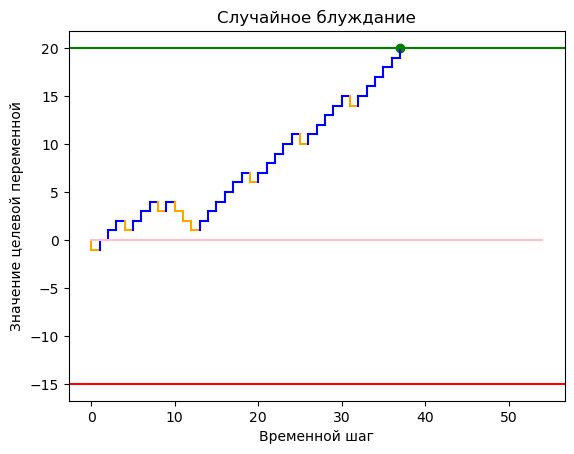

CPU times: total: 203 ms
Wall time: 200 ms


[100.0, 0.0, 0.0]

In [43]:
%%time
prob_Monte_Carlo(54, 20, 15, 0.57, K_all=1, show=True)

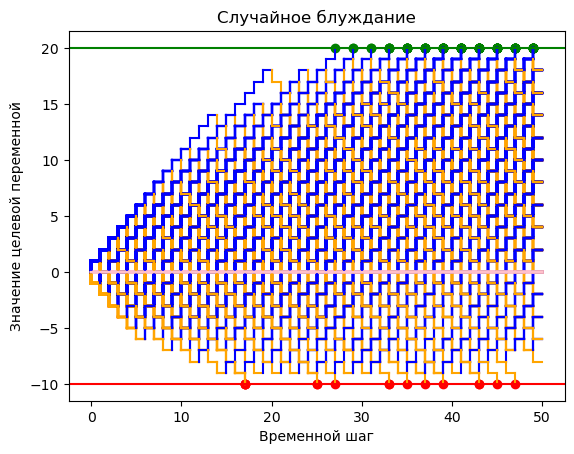

CPU times: total: 1min 7s
Wall time: 1min 7s


[10.8, 1.6, 87.6]

In [45]:
%%time
prob_Monte_Carlo(max_N=50, upper_limit=20, lower_limit=10, p_succ=0.6, K_all=1000, show=True)

In [57]:
prob_solver(3, 3, 2, 0.3)

[2.7, 48.99999999999999, 48.3]

# логичные моменты
prob_solver(9, 3, 2, 0.3)
1) при маленьком количестве шагов невозможно достигнуть sl и tp (потому что шагов не хватит)
2) при трёх шагах вероятность достигнуть тейк 0.027 = 0.3х0.3х0.3
3) четные и нечетные количества шагов (Ксюша говорила) не влияют
4) Прошла проверку по монте-карло